**Calimlim, Claude BSCS 4-A**

> Indented block



**Activity #5** SVM , Deploy the model on the local Web server.

#Importing Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)


2.14.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Preprocessing

In [ ]:
#I load my dataset from a CSV file into a DataFrame named 'data_s'
#https://drive.google.com/file/d/1ZqWz8exVddC2-dI4xZdNfSBEywSMOc7T/view?usp=sharing

file_id = '1ZqWz8exVddC2-dI4xZdNfSBEywSMOc7T'
link = f'https://drive.google.com/uc?id={file_id}'
Univ_svm = pd.read_csv(link)
Univ_svm

#I display the first 7 rows of my DataFrame to get a glimpse of the data
Univ_svm.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0.0,0.0,1.0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0.0,0.0,1.0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0.0,0.0,0.0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0.0,0.0,0.0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0.0,0.0,0.0,0,0,1


In [ ]:
# Check for null values in dataset
Univ_svm.isnull().sum()
#As you can see we have missin value in the feild of ("Mortgage","Personal Loan", "Securities Account")

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              2
Personal Loan         1
Securities Account    1
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
new_dt = Univ_svm.drop(["ID","ZIP Code"], axis = 1)
new_dt.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0.0,0.0,1.0,0,0,0
1,45,19,34,3,1.5,1,0.0,0.0,1.0,0,0,0
2,39,15,11,1,1.0,1,0.0,0.0,0.0,0,0,0
3,35,9,100,1,2.7,2,0.0,0.0,0.0,0,0,0
4,35,8,45,4,1.0,2,0.0,0.0,0.0,0,0,1


In [ ]:
# Create a SimpleImputer instance with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the 'Personal Loan', 'Mortgage', 'Securities Account' column with the imputer
new_dt['Personal Loan'] = imputer.fit_transform(new_dt[['Personal Loan']])
new_dt['Mortgage'] = imputer.fit_transform(new_dt[['Mortgage']])
new_dt['Securities Account'] = imputer.fit_transform(new_dt[['Securities Account']])

# Display the updated DataFrame with missing values filled
print(new_dt)

      Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1       0.0   
1      45          19      34       3    1.5          1       0.0   
2      39          15      11       1    1.0          1       0.0   
3      35           9     100       1    2.7          2       0.0   
4      35           8      45       4    1.0          2       0.0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3       0.0   
4996   30           4      15       4    0.4          1      85.0   
4997   63          39      24       2    0.3          3       0.0   
4998   65          40      49       3    0.5          2       0.0   
4999   28           4      83       3    0.8          1       0.0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0               0.0                 1.0           0       0           0  
1               0.0    

**Heatmap**

<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

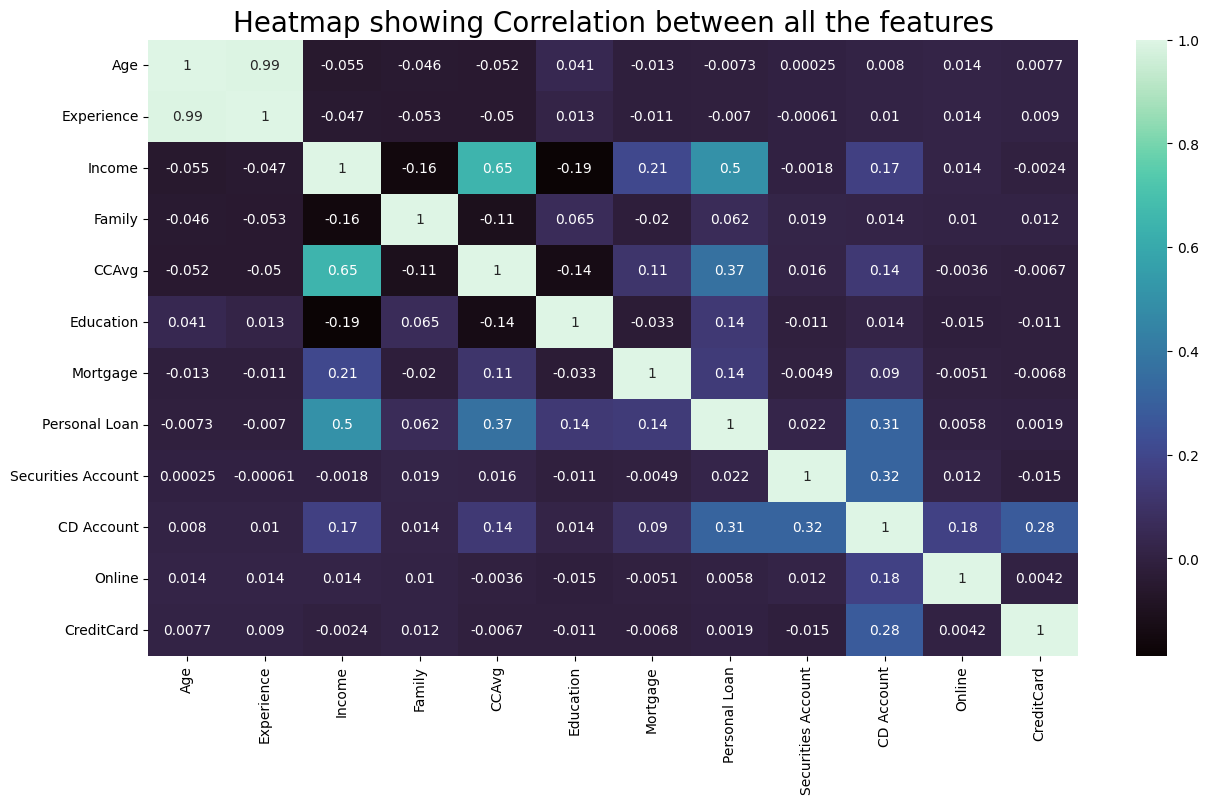

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(new_dt.corr(),annot = True, cmap='mako')

**Separating the class 0 and class 1 CreditCard data**

In [ ]:
z_class = new_dt[new_dt.CreditCard==0]
z_class.shape

(3530, 12)

In [ ]:
o_class = new_dt[new_dt.CreditCard==1]
o_class.shape

(1470, 12)

**Scaling the data**

In [ ]:
# Scaling the data using Standard Scaler

scaler = StandardScaler()
scaled = scaler.fit(new_dt.drop('CreditCard',axis=1)).transform(new_dt.drop('CreditCard',axis=1))
df_scaled = pd.DataFrame(scaled, columns=new_dt.columns[:-1])
df_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555274,-0.325568,2.932018,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555274,-0.325568,2.932018,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555274,-0.325568,-0.341130,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555274,-0.325568,-0.341130,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555274,-0.325568,-0.341130,-0.25354,-1.216618


In [ ]:
# Splitting the columns in to dependent variable (x) and independent variable (y).
x = df_scaled
y = new_dt['CreditCard']
x,y.head()

(           Age  Experience    Income    Family     CCAvg  Education  Mortgage  \
 0    -1.774417   -1.666078 -0.538229  1.397414 -0.193385  -1.049078 -0.555274   
 1    -0.029524   -0.096330 -0.864109  0.525991 -0.250611  -1.049078 -0.555274   
 2    -0.552992   -0.445163 -1.363793 -1.216855 -0.536736  -1.049078 -0.555274   
 3    -0.901970   -0.968413  0.569765 -1.216855  0.436091   0.141703 -0.555274   
 4    -0.901970   -1.055621 -0.625130  1.397414 -0.536736   0.141703 -0.555274   
 ...        ...         ...       ...       ...       ...        ...       ...   
 4995 -1.425438   -1.491662 -0.733757 -1.216855 -0.021710   1.332484 -0.555274   
 4996 -1.338194   -1.404454 -1.276892  1.397414 -0.880087  -1.049078  0.281169   
 4997  1.540880    1.647835 -1.081363 -0.345432 -0.937312   1.332484 -0.555274   
 4998  1.715370    1.735043 -0.538229  0.525991 -0.822862   0.141703 -0.555274   
 4999 -1.512683   -1.404454  0.200434  0.525991 -0.651186  -1.049078 -0.555274   
 
       Persona

In [ ]:
x

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555274,-0.325568,2.932018,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555274,-0.325568,2.932018,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555274,-0.325568,-0.341130,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555274,-0.325568,-0.341130,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555274,-0.325568,-0.341130,-0.25354,-1.216618
...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.425438,-1.491662,-0.733757,-1.216855,-0.021710,1.332484,-0.555274,-0.325568,-0.341130,-0.25354,0.821951
4996,-1.338194,-1.404454,-1.276892,1.397414,-0.880087,-1.049078,0.281169,-0.325568,-0.341130,-0.25354,0.821951
4997,1.540880,1.647835,-1.081363,-0.345432,-0.937312,1.332484,-0.555274,-0.325568,-0.341130,-0.25354,-1.216618
4998,1.715370,1.735043,-0.538229,0.525991,-0.822862,0.141703,-0.555274,-0.325568,-0.341130,-0.25354,0.821951


#Implimentation of SVM

In [ ]:
# Split data in to train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Apply SVM Model
model=SVC()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.749


<Axes: >

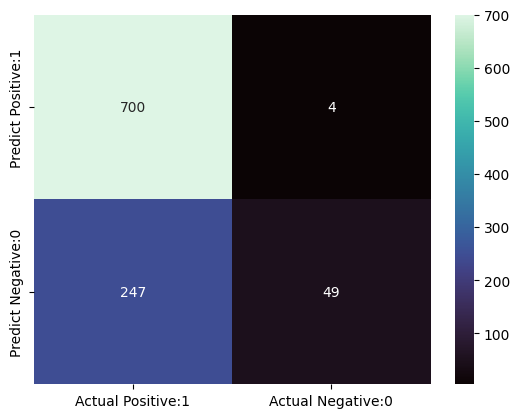

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000



Classification Report Summary:

**Precision:** Measures accuracy of positive predictions (0.74 for class 1)

**Recall:** Measures how many actual positives were predicted (0.99 for class 1).

**F1-score:** Harmonic mean of precision and recall (0.85 for class 1).

**Accuracy**: Overall model accuracy (0.75).

**Macro Avg:** Average of metrics, treating classes equally (0.83, 0.58, 0.56).

**Weighted Avg:** Weighted average considering class support (0.79, 0.75, 0.68).

**Interpretation:** The model performs well at capturing actual positive cases but has room for improvement in class 0 predictions.


#Save the model

In [ ]:
# save the model to disk
import pickle
pickle.dump(model, open('model_act5.pkl','wb'))